In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats

In [ ]:
# filename = os.path.join(os.getcwd(), "data", "train.csv")
#df = pd.read_csv(filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Accenture #1 (NYC) - Guess the Credit Score (Team A)/Data sets/'
dataset_path = folder_path + 'train.csv'
df = pd.read_csv(dataset_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-05ce161f0ac8>:5: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df.shape

(100000, 28)

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
#missing values
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
#Checking datatypes of columns
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
df['Customer_ID'].nunique()

12500

In [ ]:
df['Customer_ID'].unique()

array(['CUS_0xd40', 'CUS_0x21b1', 'CUS_0x2dbc', ..., 'CUS_0xaf61',
       'CUS_0x8600', 'CUS_0x942c'], dtype=object)

In [ ]:
df['Month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August'], dtype=object)

In [ ]:
df.dtypes
#age
#annual income
#Num_of_Loan
#Num_of_Delayed_Payment
#Changed_Credit_Limit



ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [ ]:
#dropping the columns unnecessary
df.drop(columns= ['Name', 'ID','SSN'], axis = 1,  inplace=True)

In [ ]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

# Data Exploration and cleaning

#Num of loans

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '').astype(float)

In [ ]:
print(df['Num_of_Loan'].dtype)

float64


In [ ]:
# Replace missing or NaN values in 'Column1' with -1
df['Num_of_Loan'].fillna(-1, inplace=True)

In [ ]:
df['Num_of_Loan'].min()

-100.0

In [ ]:
df['Num_of_Loan'] = np.where(df['Num_of_Loan'] < 0, -1, df['Num_of_Loan'])

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)

In [ ]:
df['Num_of_Loan'].max()

1496

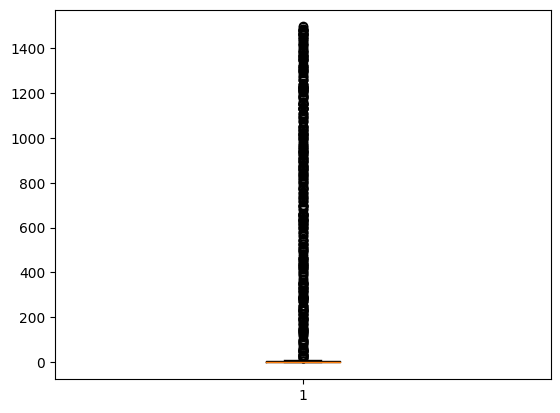

In [ ]:
plt.boxplot(df['Num_of_Loan'])
plt.show()

In [ ]:
#check if winsorization is needed
Num_of_Loan_99 = np.percentile(df['Num_of_Loan'], 99.5)
Num_of_Loan_99

9.0

In [ ]:
Num_of_Loan_999 = np.percentile(df['Num_of_Loan'], 99.9)
Num_of_Loan_999

1189.007000000027

In [ ]:
df['Num_of_Loan_new'] = stats.mstats.winsorize(df['Num_of_Loan'], limits=[0.0, 0.01])
df.head(15)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_of_Loan_new
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,4
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,4
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,4
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,4
5,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,4
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,4
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,4
8,CUS_0x21b1,January,28_,_______,34847.84,3037.986667,2,4,6,1,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,1
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6,1,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,1


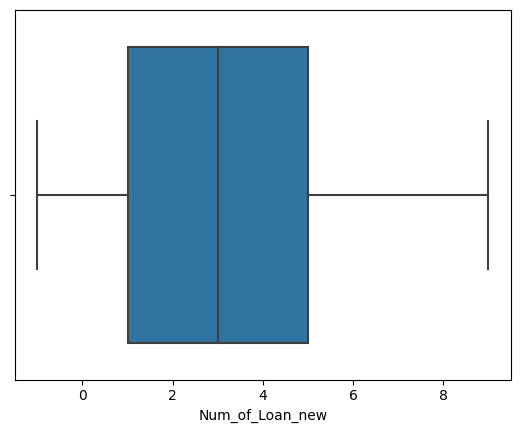

In [ ]:
sns.boxplot(x='Num_of_Loan_new', data=df)
plt.show()

In [ ]:
df['Num_of_Loan_new'].unique()

array([ 4,  1,  3,  9, -1,  0,  2,  7,  5,  6,  8])

In [ ]:
df['Num_of_Loan'] = df['Num_of_Loan_new']
df.drop(columns=['Num_of_Loan_new'], inplace=True)

#Annual_Income

In [ ]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [ ]:
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '').astype(float)
df['Annual_Income'].fillna(-1, inplace=True)

In [ ]:
df['Annual_Income'] = df['Annual_Income'].round(2)

In [ ]:
df['Annual_Income'].unique()

array([ 19114.12,  34847.84, 143162.64, ...,  37188.1 ,  20002.88,
        39628.99])

In [ ]:
print(df['Annual_Income'].dtype)

float64


In [ ]:
df['Annual_Income'].min()

7005.93

In [ ]:
df['Annual_Income'].max()

24198062.0

#Num_of_Delayed_Payment:

In [ ]:
df['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '').astype(float)
df['Num_of_Delayed_Payment'].fillna(-1, inplace=True)

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

In [ ]:
print(df['Num_of_Delayed_Payment'].dtype)

int64


In [ ]:
df['Num_of_Delayed_Payment'].min()

-3

In [ ]:
df['Num_of_Delayed_Payment'] = np.where(df['Num_of_Delayed_Payment'] < 0, -1, df['Num_of_Delayed_Payment'])

In [ ]:
df['Num_of_Delayed_Payment'].min()

-1

In [ ]:
df['Num_of_Delayed_Payment'].max()

4397

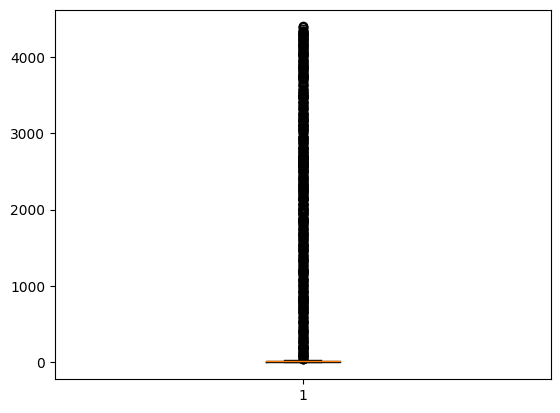

In [ ]:
plt.boxplot(df['Num_of_Delayed_Payment'])
plt.show()

In [ ]:
#check if winsorization is needed
Num_of_Delayed_Payment_99 = np.percentile(df['Num_of_Delayed_Payment'], 99.2)
Num_of_Delayed_Payment_99

28.0

In [ ]:
Num_of_Delayed_Payment_99 = np.percentile(df['Num_of_Delayed_Payment'], 99.9)
Num_of_Delayed_Payment_99

3815.0040000000154

In [ ]:
df['Num_of_Delayed_Payment_new'] = stats.mstats.winsorize(df['Num_of_Delayed_Payment'], limits=[0.0, 0.01])
df.head(15)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_of_Delayed_Payment_new
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,7
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,-1
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,7
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,-1
5,CUS_0xd40,June,23,Scientist,19114.12,NaN,3,4,3,4,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,4
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,8
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3,4,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,6
8,CUS_0x21b1,January,28_,_______,34847.84,3037.986667,2,4,6,1,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,4
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6,1,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,1


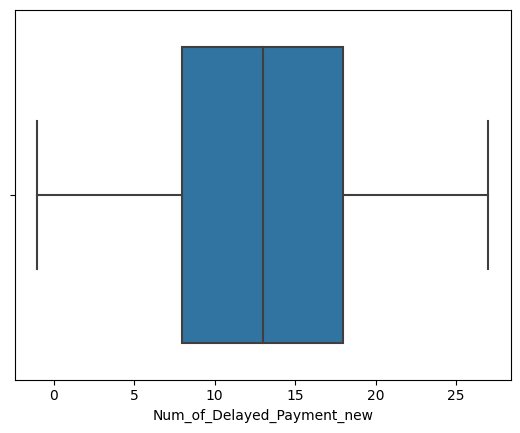

In [ ]:
sns.boxplot(x='Num_of_Delayed_Payment_new', data=df)
plt.show()

In [ ]:
df['Num_of_Delayed_Payment_new'].unique()

array([ 7, -1,  4,  8,  6,  1,  3,  0,  5,  9, 12, 15, 17, 10,  2, 11, 14,
       20, 22, 13, 16, 18, 19, 23, 24, 21, 27, 26, 25])

In [ ]:
df['Num_of_Delayed_Payment_new'] = df['Num_of_Delayed_Payment_new']
df.drop(columns=['Num_of_Delayed_Payment_new'], inplace=True)

#Delay_from_due_date


In [ ]:
print(df['Delay_from_due_date'].dtype)

int64


In [ ]:
df['Delay_from_due_date'].min()
#allowed to be negative

-5

# Interest Rate (Stephen)


In [ ]:
df['Interest_Rate'].unique()


array([   3,    6,    8, ..., 1347,  387, 5729])

In [ ]:
np.sum(df["Interest_Rate"]>100)

2012

In [ ]:
avg = df["Interest_Rate"].mean()
print(avg)
df["Interest_Rate"] = df["Interest_Rate"].apply(lambda x: avg if x > 100 else x)
df["Interest_Rate"]

72.46604


0         3.00000
1         3.00000
2         3.00000
3         3.00000
4         3.00000
           ...   
99995     7.00000
99996     7.00000
99997    72.46604
99998     7.00000
99999     7.00000
Name: Interest_Rate, Length: 100000, dtype: float64

In [ ]:
df['Interest_Rate'].min()

1.0

In [ ]:
df['Interest_Rate'].max()

100.0

# Occupation (Stephen)

In [ ]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [ ]:
(df['Occupation'] == '_______').sum()

7062

In [ ]:
df['Occupation'] = np.where(df['Occupation'] == '_______', "Unemployed", df["Occupation"])

In [ ]:
df['Occupation']

0        Scientist
1        Scientist
2        Scientist
3        Scientist
4        Scientist
           ...    
99995     Mechanic
99996     Mechanic
99997     Mechanic
99998     Mechanic
99999     Mechanic
Name: Occupation, Length: 100000, dtype: object

# Monthly Inhand Income (Stephen)

In [ ]:
print(df['Monthly_Inhand_Salary'].describe())

count    84998.000000
mean      4194.170850
std       3183.686167
min        303.645417
25%       1625.568229
50%       3093.745000
75%       5957.448333
max      15204.633333
Name: Monthly_Inhand_Salary, dtype: float64


In [ ]:
missing_values = df['Monthly_Inhand_Salary'].isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: 15002


In [ ]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333])

In [ ]:
df['Monthly_Inhand_Salary'].fillna(method='ffill', inplace=True)

In [ ]:
df['Monthly_Inhand_Salary'].unique()

array([ 1824.84333333,  3037.98666667, 12187.22      , ...,
        3097.00833333,  1929.90666667,  3359.41583333])

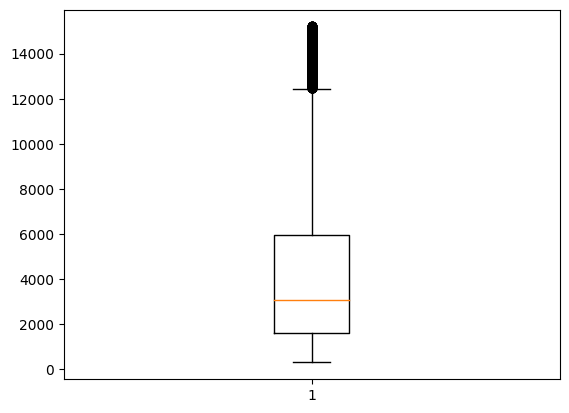

In [ ]:
plt.boxplot(df['Monthly_Inhand_Salary'])
plt.show()

# Type of Loan (Stephen)

In [ ]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [ ]:
print(df['Type_of_Loan'].describe())

count             88592
unique             6260
top       Not Specified
freq               1408
Name: Type_of_Loan, dtype: object


In [ ]:
df['Type_of_Loan'].fillna("Not Specified", inplace=True)

In [ ]:
df['Type_of_Loan']

0        Auto Loan, Credit-Builder Loan, Personal Loan,...
1        Auto Loan, Credit-Builder Loan, Personal Loan,...
2        Auto Loan, Credit-Builder Loan, Personal Loan,...
3        Auto Loan, Credit-Builder Loan, Personal Loan,...
4        Auto Loan, Credit-Builder Loan, Personal Loan,...
                               ...                        
99995                          Auto Loan, and Student Loan
99996                          Auto Loan, and Student Loan
99997                          Auto Loan, and Student Loan
99998                          Auto Loan, and Student Loan
99999                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

In [ ]:
print(df['Type_of_Loan'].describe())

count            100000
unique             6260
top       Not Specified
freq              12816
Name: Type_of_Loan, dtype: object


# Num Credit Card - Jamie

In [ ]:
df['Num_Credit_Card'].unique()


array([   4, 1385,    5, ...,  955, 1430,  679])

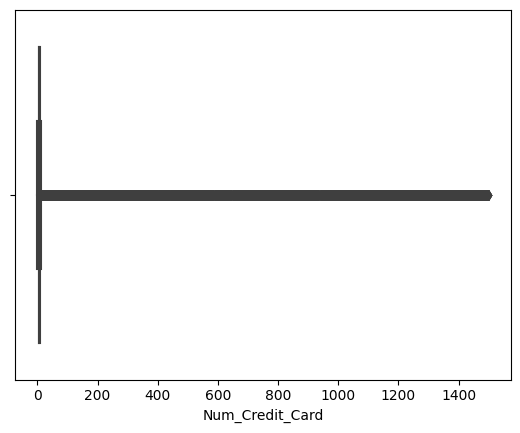

In [ ]:
sns.boxplot(x='Num_Credit_Card', data=df)
plt.show()

In [ ]:
ncc_995 = np.percentile(df['Num_Credit_Card'], 99.5)
ncc_995

1177.0

In [ ]:
ncc_999 = np.percentile(df['Num_Credit_Card'], 99.9)
ncc_999

1432.0020000000077

In [ ]:
df['Num_Credit_Card_win'] = stats.mstats.winsorize(df['Num_Credit_Card'], limits=[0.01, 0.05])
df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Credit_Card_win
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,4
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,4
2,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,4
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,4
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,4
5,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,4
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,4
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,4
8,CUS_0x21b1,January,28_,Unemployed,34847.84,3037.986667,2,4,6.0,1,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,4
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6.0,1,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,4


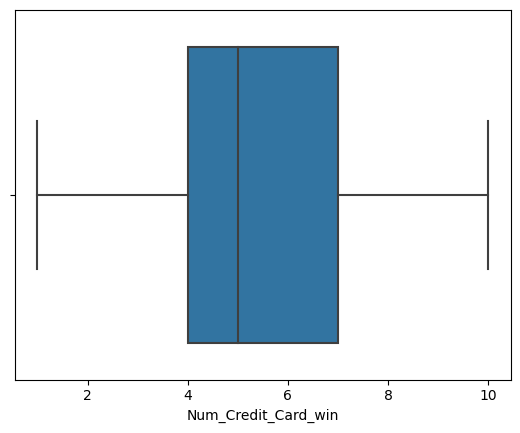

In [ ]:
sns.boxplot(x='Num_Credit_Card_win', data=df)
plt.show()

In [ ]:
df['Num_Credit_Card'] = df['Num_Credit_Card_win']

In [ ]:
df.drop(columns=['Num_Credit_Card_win'], inplace=True)

# Changed Credit Limit - Jamie

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '-1').astype(float)

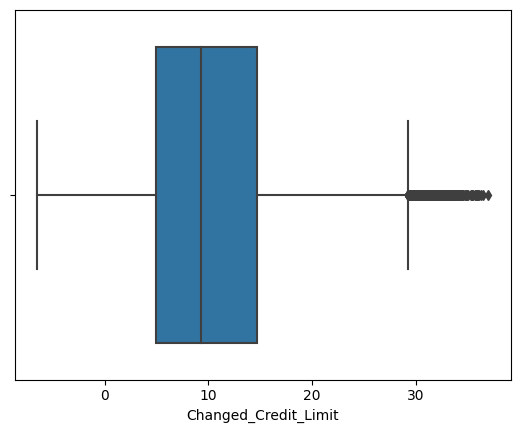

In [ ]:
sns.boxplot(x='Changed_Credit_Limit', data=df)
plt.show()

In [ ]:
ccl999 = np.percentile(df['Changed_Credit_Limit'], 99.9)
ccl999

32.45002000000008

In [ ]:
df['Changed_Credit_Limit_win'] = stats.mstats.winsorize(df['Changed_Credit_Limit'], limits=[0.00, 0.01])
df.head(10)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Changed_Credit_Limit_win
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,11.27
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,11.27
2,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,-1.00
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,6.27
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,11.27
5,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,9.27
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,11.27
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,11.27
8,CUS_0x21b1,January,28_,Unemployed,34847.84,3037.986667,2,4,6.0,1,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,5.42
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6.0,1,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,7.42


# Num_Credit_Inquiries - Jamie

In [ ]:
df['Num_Credit_Inquiries'].fillna(-1, inplace=True)

In [ ]:
df['Num_Credit_Inquiries'].dtype

dtype('float64')

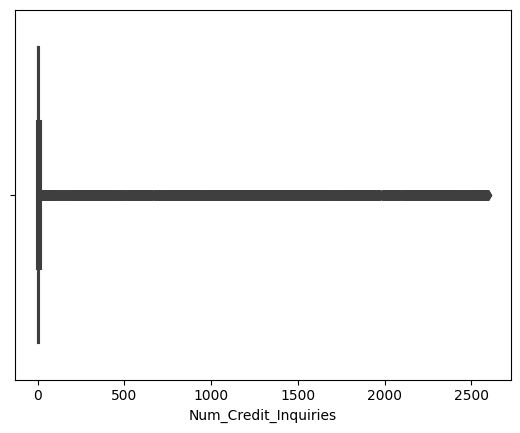

In [ ]:
sns.boxplot(x='Num_Credit_Inquiries', data=df)
plt.show()

In [ ]:
df['Num_Credit_Inquiries'].max()

2597.0

In [ ]:
nni995 = np.percentile(df['Num_Credit_Inquiries'], 99.5)
nni995

1805.0100000000093

In [ ]:
nni999 = np.percentile(df['Num_Credit_Inquiries'], 99.9)
nni999

2418.0020000000077

In [ ]:
df['Num_Credit_Inquiries_win'] = stats.mstats.winsorize(df['Num_Credit_Inquiries'], limits=[0.00, 0.05])
df.head(15)

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Changed_Credit_Limit_win,Num_Credit_Inquiries_win
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,11.27,4.0
1,CUS_0xd40,February,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,11.27,4.0
2,CUS_0xd40,March,-500,Scientist,19114.12,1824.843333,3,4,3.0,4,...,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,-1.00,4.0
3,CUS_0xd40,April,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,6.27,4.0
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,11.27,4.0
5,CUS_0xd40,June,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,9.27,4.0
6,CUS_0xd40,July,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,11.27,4.0
7,CUS_0xd40,August,23,Scientist,19114.12,1824.843333,3,4,3.0,4,...,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,11.27,4.0
8,CUS_0x21b1,January,28_,Unemployed,34847.84,3037.986667,2,4,6.0,1,...,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,5.42,2.0
9,CUS_0x21b1,February,28,Teacher,34847.84,3037.986667,2,4,6.0,1,...,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,7.42,2.0


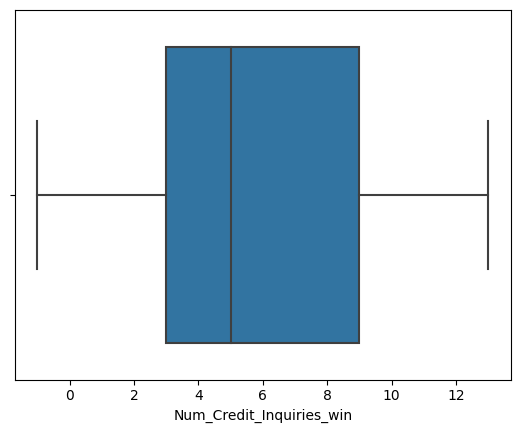

In [ ]:
sns.boxplot(x='Num_Credit_Inquiries_win', data=df)
plt.show()

In [ ]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries_win']


In [ ]:
df.drop(columns=['Num_Credit_Inquiries_win'], inplace=True)

# Credit mix - Jamie

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'NI')

In [ ]:
df['Credit_Mix'].unique()

array(['NI', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
df['Credit_Mix'].describe()

count       100000
unique           4
top       Standard
freq         36479
Name: Credit_Mix, dtype: object

# Credit_Utilization_Ratio (Vanessa)

In [ ]:
print(df['Credit_Utilization_Ratio'].describe())

count    100000.000000
mean         32.285173
std           5.116875
min          20.000000
25%          28.052567
50%          32.305784
75%          36.496663
max          50.000000
Name: Credit_Utilization_Ratio, dtype: float64


In [ ]:
# Check for missing values
missing_values = df['Credit_Utilization_Ratio'].isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


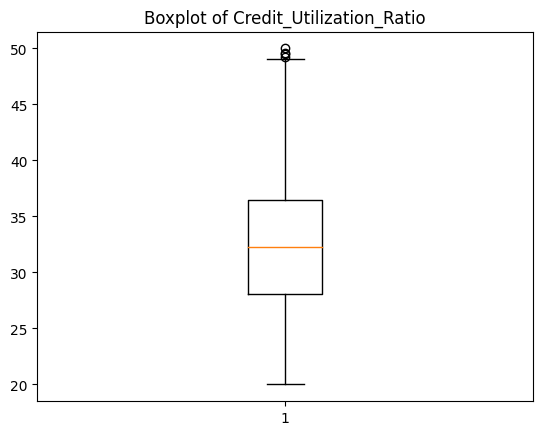

In [ ]:
# Check for outliers

import matplotlib.pyplot as plt

plt.boxplot(df['Credit_Utilization_Ratio'])
plt.title('Boxplot of Credit_Utilization_Ratio')
plt.show()

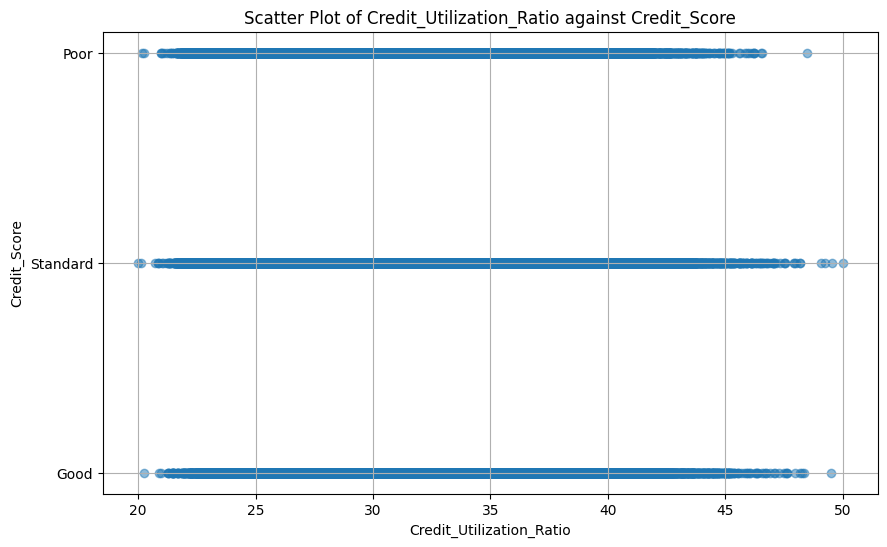

In [ ]:
# Relationship with Credit_Score & Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Credit_Utilization_Ratio'], df['Credit_Score'], alpha=0.5)
plt.title('Scatter Plot of Credit_Utilization_Ratio against Credit_Score')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Credit_Score')
plt.grid(True)
plt.show()

Doesn't seem to have significant outliers

# Payment_of_Min_Amount (Vanessa)

In [ ]:
print(df['Payment_of_Min_Amount'].describe())

count     100000
unique         3
top          Yes
freq       52326
Name: Payment_of_Min_Amount, dtype: object


In [ ]:
# Check for missing values
missing_values = df['Credit_Utilization_Ratio'].isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


In [ ]:
print(df['Payment_of_Min_Amount'].unique())

['No' 'NM' 'Yes']


In [ ]:
# Replace 'NM' with -1 in the 'Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'].replace('NM', -1, inplace=True)

# Check the updated values
print(df['Payment_of_Min_Amount'].value_counts())

Yes    52326
No     35667
-1     12007
Name: Payment_of_Min_Amount, dtype: int64


# Total_EMI_per_month (Vanessa)

In [ ]:
print(df['Total_EMI_per_month'].describe())

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64


In [ ]:
# Check for missing values
missing_values = df['Credit_Utilization_Ratio'].isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: 0


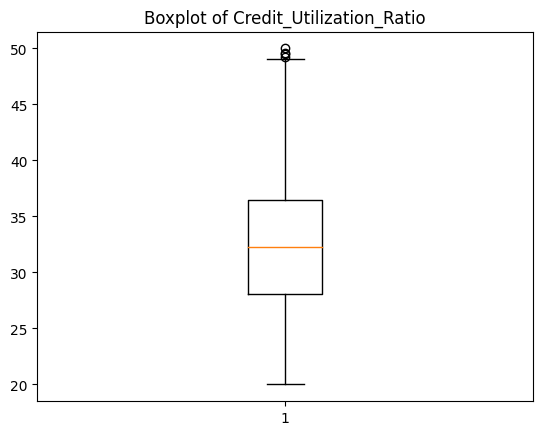

In [ ]:
# Check for outliers

import matplotlib.pyplot as plt

plt.boxplot(df['Credit_Utilization_Ratio'])
plt.title('Boxplot of Credit_Utilization_Ratio')
plt.show()

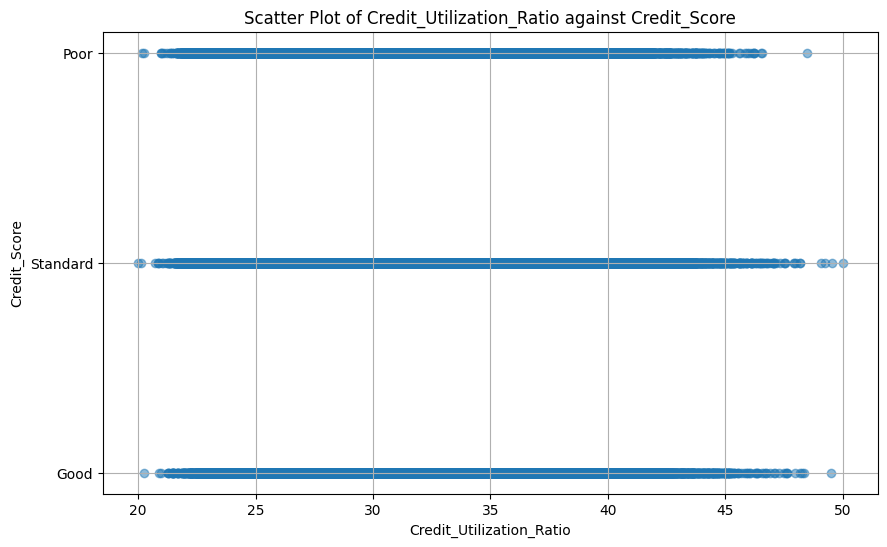

In [ ]:
# Relationship with Credit_Score & Outliers
plt.figure(figsize=(10, 6))
plt.scatter(df['Credit_Utilization_Ratio'], df['Credit_Score'], alpha=0.5)
plt.title('Scatter Plot of Credit_Utilization_Ratio against Credit_Score')
plt.xlabel('Credit_Utilization_Ratio')
plt.ylabel('Credit_Score')
plt.grid(True)
plt.show()

Doesn't seem to have significant outliers

# Amount_invested_monthly (Vanessa)

In [ ]:
print(df['Amount_invested_monthly'].describe())

count         95521
unique        91049
top       __10000__
freq           4305
Name: Amount_invested_monthly, dtype: object


In [ ]:
# Check for missing values
missing_values = df['Amount_invested_monthly'].isnull().sum()
print(f"Missing values: {missing_values}")

Missing values: 4479


Dealing with non-numeric values:

In [ ]:
# Create a mask for non-numeric values, while also handling NaN values
mask = df['Amount_invested_monthly'].str.contains('[^\d.]', regex=True, na=False)

# Filter rows using the mask
non_numeric_values = df[mask]['Amount_invested_monthly']

In [ ]:
# Display unique non-numeric values
unique_non_numeric_values = non_numeric_values.unique()
print(unique_non_numeric_values)


['__10000__']


Cleaned & filled the missing values with -1:

In [ ]:
# 1. Replace `__10000__` with NaN
df['Amount_invested_monthly'].replace('__10000__', pd.NA, inplace=True)

# 2. Replace all NaN values with -1
df['Amount_invested_monthly'].fillna(-1, inplace=True)

# 3. Convert the column to float type
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

# Check the cleaned data
print(df['Amount_invested_monthly'].describe())

count    100000.000000
mean        178.275430
std         198.551495
min          -1.000000
25%          58.325837
50%         116.545252
75%         220.039055
max        1977.326102
Name: Amount_invested_monthly, dtype: float64


# CUSTOMER ID


In [ ]:
data = pd.read_csv(dataset_path)
data.head()
df = pd.DataFrame(data)
num_rows = len(df['Customer_ID'])
print(num_rows)

100000


<ipython-input-118-ddbe150f023c>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dataset_path)


In [ ]:
null_indices = df[df['Customer_ID'].isnull()]


print("Row IDs where 'Customer_ID' has null values:")
print(null_indices.index)

missing_rows = df[df['Customer_ID'].isna()]

if not missing_rows.empty:
    print("Missing values in 'Customer_ID' found in the following rows:")
    print(missing_rows)
else:
    print("No missing values in null_indices = df[df['Column_Name'].isnull()")


print("Row IDs where 'Column_Name' has null values:")
print(null_indices.index)

Row IDs where 'Customer_ID' has null values:
Int64Index([], dtype='int64')
No missing values in null_indices = df[df['Column_Name'].isnull()
Row IDs where 'Column_Name' has null values:
Int64Index([], dtype='int64')


In [ ]:
duplicates = df[df['Customer_ID'].duplicated(keep=False)]

print("Row IDs of duplicate entries:")
print(duplicates.index)

Row IDs of duplicate entries:
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            99990, 99991, 99992, 99993, 99994, 99995, 99996, 99997, 99998,
            99999],
           dtype='int64', length=100000)


# MONTH


In [ ]:
missing_rows = df[df['Month'].isna()]

if not missing_rows.empty:
    print("Missing values in 'Month' found in the following rows:")
    print(missing_rows)
else:
    print("No missing values in 'Month'.")

No missing values in 'Month'.


In [ ]:
null_indices = df[df['Month'].isnull()]


print("Row IDs where 'Month' has null values:")
print(null_indices.index)

Row IDs where 'Month' has null values:
Int64Index([], dtype='int64')


# PAYMENT BEHAVIOR


In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace("!@9#%8", -1)

payment_behavior_values = df['Payment_Behaviour'].iloc[:40]
print(payment_behavior_values)


0      High_spent_Small_value_payments
1       Low_spent_Large_value_payments
2      Low_spent_Medium_value_payments
3       Low_spent_Small_value_payments
4     High_spent_Medium_value_payments
5                                   -1
6       Low_spent_Small_value_payments
7     High_spent_Medium_value_payments
8       Low_spent_Small_value_payments
9      High_spent_Large_value_payments
10     High_spent_Large_value_payments
11     Low_spent_Medium_value_payments
12      Low_spent_Small_value_payments
13     High_spent_Large_value_payments
14    High_spent_Medium_value_payments
15      Low_spent_Small_value_payments
16                                  -1
17     High_spent_Small_value_payments
18     High_spent_Small_value_payments
19     Low_spent_Medium_value_payments
20      Low_spent_Large_value_payments
21    High_spent_Medium_value_payments
22     High_spent_Small_value_payments
23     High_spent_Small_value_payments
24      Low_spent_Large_value_payments
25      Low_spent_Small_v

# NUM_BANK_ACCOUNTS

In [ ]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

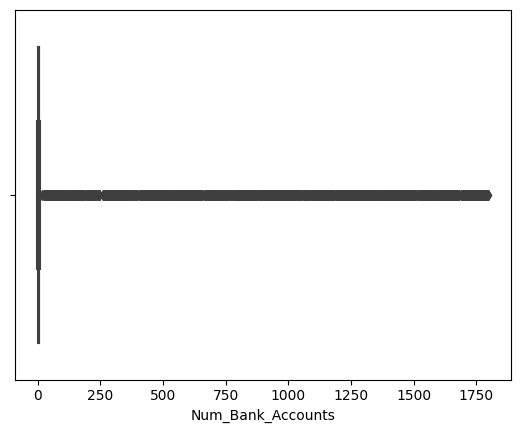

In [ ]:
sns.boxplot(x='Num_Bank_Accounts', data=df)
plt.show()

In [ ]:
# represents a value below which 99.5% of the data falls.
nba_995 = np.percentile(df['Num_Bank_Accounts'], 99.5)
nba_995

1096.0

In [ ]:
ncc_999 = np.percentile(df['Num_Bank_Accounts'], 99.9)
ncc_999

1650.0010000000038

In [ ]:
df['Num_Bank_Accounts_Win'] = stats.mstats.winsorize(df['Num_Bank_Accounts'], limits=[0.01, 0.05])
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Num_Bank_Accounts_Win
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good,3
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good,3
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good,3
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good,3
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good,3
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,-1,340.4792117872438,Good,3
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good,3
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard,3
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard,2
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good,2


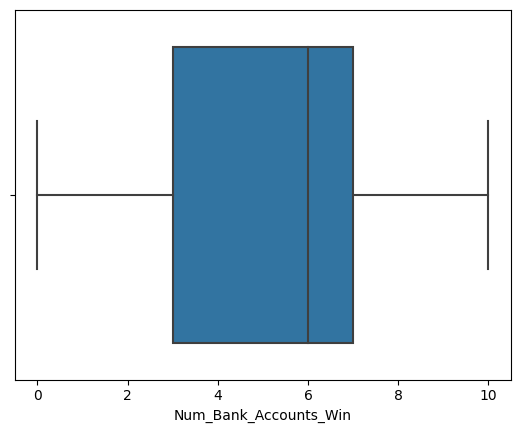

In [ ]:
sns.boxplot(x='Num_Bank_Accounts_Win', data=df)
plt.show()

In [ ]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts_Win']

In [ ]:
df.drop(columns=['Num_Bank_Accounts_Win'], inplace=True)

#Age (Sangeeta)


In [ ]:
df.head(60)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,-1,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [ ]:
df['Age'].head(15)

0       23
1       23
2     -500
3       23
4       23
5       23
6       23
7       23
8      28_
9       28
10      28
11      28
12      28
13      28
14      28
Name: Age, dtype: object

In [ ]:
#Getting rid of the underscores
#Converting those from strings to int
df['Age'] = df['Age'].str.replace('_', '', regex=True).astype(int)

In [ ]:
df['Age'].head(15)

0      23
1      23
2    -500
3      23
4      23
5      23
6      23
7      23
8      28
9      28
10     28
11     28
12     28
13     28
14     28
Name: Age, dtype: int64

In [ ]:
df['Age'].dtype

dtype('int64')

In [ ]:
#Gettings summary values of dataframe
summary = df.describe()
summary

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,110.649700,4194.170850,5.428660,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,686.244717,3183.686167,2.629563,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,-500.000000,303.645417,0.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,8698.000000,15204.633333,10.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df['Age'].unique()

array([  23, -500,   28, ..., 4808, 2263, 1342])

In [ ]:
#Replaced all negative age values with -1
df['Age'] = np.where(df['Age'] < 0, -1, df['Age'])

In [ ]:
#Checking for missing values
df['Age'].isna().sum()

0

In [ ]:
summary = df.describe()
summary

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,115.070840,4194.170850,5.428660,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,683.899734,3183.686167,2.629563,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,-1.000000,303.645417,0.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,8698.000000,15204.633333,10.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
#Looking at 99.9th percentile
Age_999 = np.percentile(df['Age'], 99.9)
Age_999

8234.001000000004

In [ ]:
#Looking at 90th percentile
Age_90 = np.percentile(df['Age'], 90)
Age_90

50.0

In [ ]:
#Finding the most prevalent age for each customer (so that the outliers can be replaced)
majority_ages = df.groupby('Customer_ID')['Age'].agg(lambda x: x.mode().iloc[0])


In [ ]:
majority_ages

Customer_ID
CUS_0x1000    17
CUS_0x1009    26
CUS_0x100b    18
CUS_0x1011    44
CUS_0x1013    44
              ..
CUS_0xff3     55
CUS_0xff4     37
CUS_0xff6     19
CUS_0xffc     17
CUS_0xffd     29
Name: Age, Length: 12500, dtype: int64

In [ ]:
#Applied majority_age to all rows of Age column
df['Age'] = df['Customer_ID'].map(majority_ages).fillna(df['Age'])


In [ ]:
df['Age']

0        23
1        23
2        23
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

In [ ]:
#Checking for missing values
df['Age'].isna().sum()

0

In [ ]:
df['Age'].unique()

array([23, 28, 34, 55, 21, 31, 30, 44, 40, 33, 35, 39, 37, 20, 46, 26, 41,
       32, 48, 43, 36, 16, 18, 42, 22, 19, 15, 27, 38, 14, 25, 45, 47, 17,
       53, 24, 54, 29, 49, 51, 50, 52, 56])

In [ ]:
summary = df.describe()
summary

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,33.274560,4194.170850,5.428660,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,10.764438,3183.686167,2.629563,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,14.000000,303.645417,0.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,56.000000,15204.633333,10.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [ ]:
df['Age']

0        23
1        23
2        23
3        23
4        23
         ..
99995    25
99996    25
99997    25
99998    25
99999    25
Name: Age, Length: 100000, dtype: int64

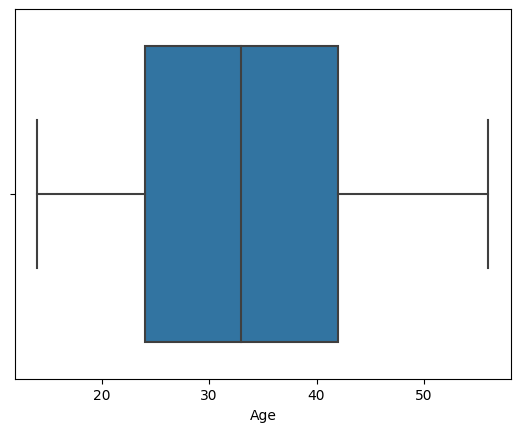

In [ ]:
sns.boxplot(x='Age', data=df)
plt.show()

In [ ]:
df.head(60)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,-1,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Oustanding_Debt (Sangeeta)

In [ ]:
df.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
#Checking for missing values
df['Outstanding_Debt'].isna().sum()

0

In [ ]:
df['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [ ]:
#Getting rid of _
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '', regex=True).astype(float)

In [ ]:
df['Outstanding_Debt'].head(15)

0     809.98
1     809.98
2     809.98
3     809.98
4     809.98
5     809.98
6     809.98
7     809.98
8     605.03
9     605.03
10    605.03
11    605.03
12    605.03
13    605.03
14    605.03
Name: Outstanding_Debt, dtype: float64

In [ ]:
#Checking datatype, should be a float
df['Outstanding_Debt'].dtype

dtype('float64')

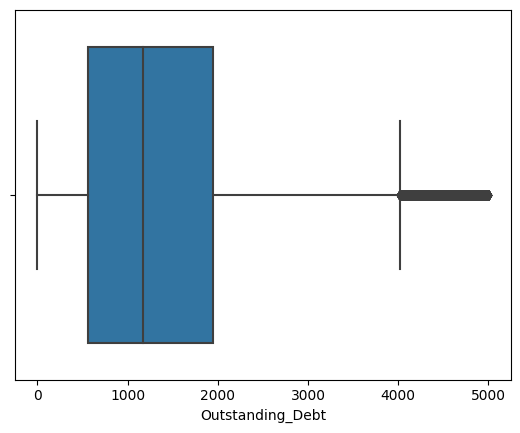

In [ ]:
#Creating a box-plot
sns.boxplot(x='Outstanding_Debt', data=df)
plt.show()

In [ ]:
df['Outstanding_Debt'].describe()

count    100000.000000
mean       1426.220376
std        1155.129026
min           0.230000
25%         566.072500
50%        1166.155000
75%        1945.962500
max        4998.070000
Name: Outstanding_Debt, dtype: float64

In [ ]:
#Decided not to winsorize, as the outliers may play a significant role in determining credit-score

# Credit-History Age (Sangeeta)

In [ ]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
df['Credit_History_Age'].dtype
#Need to convert this into a numeric dtype

dtype('O')

In [ ]:
df['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [ ]:
from numpy.lib.shape_base import split
#Created a function to convert the strings in Credit History Age to a float
def time_of_CHA_to_float(CHA_str):
  if pd.notna(CHA_str):
    time = CHA_str.split()
    years = int(time[0])
    months = int(time[3])
    result = years + (months/12)
    return result
  else:
    return None


In [ ]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(time_of_CHA_to_float)

In [ ]:
df['Credit_History_Age']

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
df['Credit_History_Age'].unique()


array([22.08333333,         nan, 22.25      , 22.33333333, 22.41666667,
       22.5       , 22.58333333, 26.58333333, 26.66666667, 26.75      ,
       26.83333333, 26.91666667, 27.        , 27.08333333, 27.16666667,
       17.75      , 17.83333333, 17.91666667, 18.08333333, 18.16666667,
       18.25      , 18.33333333, 17.25      , 17.33333333, 17.41666667,
       17.5       , 17.58333333, 17.66666667, 30.66666667, 30.75      ,
       30.83333333, 30.91666667, 31.        , 31.08333333, 31.16666667,
       31.25      , 32.        , 32.16666667, 32.25      , 32.41666667,
       32.5       , 30.58333333, 14.66666667, 14.75      , 14.83333333,
       14.91666667, 15.        , 15.08333333, 15.16666667, 21.33333333,
       21.41666667, 21.5       , 21.58333333, 21.66666667, 21.75      ,
       21.83333333, 21.91666667, 26.5       , 19.16666667, 19.25      ,
       19.33333333, 19.41666667, 19.5       , 19.58333333, 19.66666667,
       25.41666667, 25.5       , 25.58333333, 25.66666667, 25.75

In [ ]:
df['Credit_History_Age'].isna().sum()

9030

In [ ]:
df['Credit_History_Age']

0        22.083333
1              NaN
2        22.250000
3        22.333333
4        22.416667
           ...    
99995    31.500000
99996    31.583333
99997    31.666667
99998    31.750000
99999    31.833333
Name: Credit_History_Age, Length: 100000, dtype: float64

In [ ]:
#Filling in n/a values with -1
df['Credit_History_Age'].fillna(-1, inplace = True)

In [ ]:
df['Credit_History_Age'].isna().sum()

0

# Monthly Balance (Sangeeta)

In [ ]:
df['Monthly_Balance']

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 100000, dtype: object

In [ ]:
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [ ]:
df['Monthly_Balance'].dtype
#Checking dtype - should be a float

dtype('O')

In [ ]:
df['Monthly_Balance'].describe()

count                                98800
unique                               98792
top       __-333333333333333333333333333__
freq                                     9
Name: Monthly_Balance, dtype: object

In [ ]:
#Checking missing-value count
missing_values = df['Monthly_Balance'].isnull().sum()
missing_values

1200

In [ ]:
df['Monthly_Balance']

0        312.49408867943663
1        284.62916249607184
2         331.2098628537912
3        223.45130972736786
4        341.48923103222177
                ...        
99995            479.866228
99996             496.65161
99997            516.809083
99998            319.164979
99999            393.673696
Name: Monthly_Balance, Length: 100000, dtype: object

In [ ]:
type(df['Monthly_Balance'].iloc[99999])

float

In [ ]:
#Checking how many occurances of this there are
df['Monthly_Balance'].value_counts()['__-333333333333333333333333333__']

9

In [ ]:
df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__', -1)


In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'])


In [ ]:
df['Monthly_Balance']

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

In [ ]:
missing_values = df['Monthly_Balance'].isnull().sum()
missing_values

1200

In [ ]:
df['Monthly_Balance'].fillna(-1, inplace=True)


In [ ]:
missing_values = df['Monthly_Balance'].isnull().sum()
missing_values

0

In [ ]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        397.672323
std         217.154187
min          -1.000000
25%         267.871374
50%         334.806633
75%         467.670597
max        1602.040519
Name: Monthly_Balance, dtype: float64

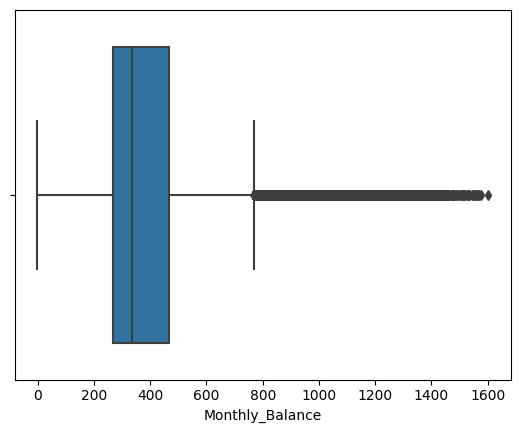

In [ ]:
#Checking to see if winsorization is needed.
sns.boxplot(x='Monthly_Balance', data=df)
plt.show()

In [ ]:
df['Monthly_Balance'].describe()

count    100000.000000
mean        397.672323
std         217.154187
min          -1.000000
25%         267.871374
50%         334.806633
75%         467.670597
max        1602.040519
Name: Monthly_Balance, dtype: float64